In [3]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt

/home/hongwei/miniconda3/envs/rebut/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from models.Resnet18 import resnet18
from models.Resnet18_SD import resnet18_sd

In [3]:
from fvcore.nn import FlopCountAnalysis as FCA

In [4]:
def test_flops(model):
    input_tensor = torch.randn(1,3,32,32)
    flops = FCA(model, input_tensor)
    return flops.total() / 1e6 # MegaFlops

In [5]:
model_resnet18 = resnet18(100, 64)
model_resnet18_sd = resnet18_sd(100, 64)

In [6]:
test_flops(model_resnet18)

Unsupported operator aten::add_ encountered 8 time(s)
The following submodules of the model were never called during the trace of the graph. They may be unused, or they were accessed by direct calls to .forward() or via other python methods. In the latter case they will have zeros for statistics, though their statistics will still contribute to their parent calling module.
layer1.0.shortcut, layer1.1.shortcut, layer2.1.shortcut, layer3.1.shortcut, layer4.1.shortcut, simclr


558.548992

In [7]:
test_flops(model_resnet18_sd)

/home/hongwei/miniconda3/envs/rebut/lib/python3.8/site-packages/torch/nn/functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
Unsupported operator aten::add_ encountered 8 time(s)
Unsupported operator aten::sigmoid encountered 3 time(s)
Unsupported operator aten::mul encountered 3 time(s)
The following submodules of the model were never called during the trace of the graph. They may be unused, or they were accessed by direct calls to .forward() or via other python methods. In the latter case they will have zeros for statistics, though their statistics will still contribute to their parent calling module.
final_addaption_layer, layer1.0.shortcut, layer1.1.shortcut, layer2.1.shortcut, layer3.1.shortcut, layer4.1.shortcut, moe_layer, simclr.0, simclr.1, simclr.2, simclr.3


586.784768

In [176]:
acc_list = {
    '200':  [15.7, 19.1, 19.5, 20.2, 18.9, 18.9, 18.1, 17.5],
    '500':  [23.6, 26.2, 26.8, 28.3, 25.9, 25.9, 25.1, 25.6],
    '1000': [31.2, 34.3, 34.5, 35.1, 35.8, 35.3, 34.0, 33.8],
    '2000': [41.7, 42.7, 44.1, 45.1, 44.4, 44.8, 44.4, 44.5],
}

af_list = {
    '200':  [53.9, 48.2, 48.4, 47.5, 50.0, 50.1, 51.8, 52.5],
    '500':  [48.9, 43.3, 43.5, 44.3, 46.2, 45.3, 47.4, 46.6],
    '1000': [42.5, 36.6, 37.0, 36.9, 36, 37.3, 40.7, 41.8],
    '2000': [29.6, 26.9, 25.4, 25.4, 25.7, 25, 27.2, 29.3],
}

markers = {
    '200':  'o',
    '500':  'v',
    '1000': '^',
    '2000': 's'
}

def plot_curve(data_list, ylabel='AC(%)↑', with_legend=True):
    x = np.arange(1, 9)
    fig = plt.figure(figsize=(8,5))
    for key, data in data_list.items():
        plt.plot(x, data, label=key, marker=markers[key], linewidth=3.5, markersize=12)
    plt.xlabel('n: # of experts', fontdict={'size': 22})
    plt.ylabel(ylabel, fontdict={'size': 22})
    plt.xticks(x, size=20)
    plt.yticks(size=20)
    if with_legend:
        # plt.legend(loc='upper center',fontsize=18, ncols=2, bbox_to_anchor=(0.5, 0.93))
        plt.legend(loc='upper right',fontsize=18, ncols=2, bbox_to_anchor=(1.0, 0.93))
    plt.show()

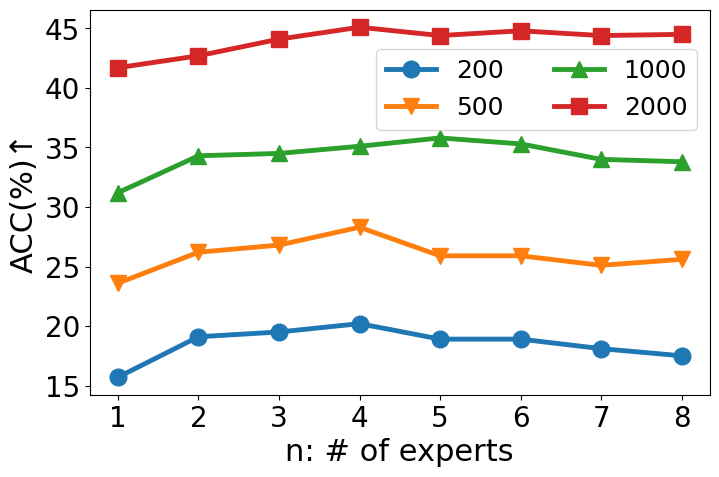

In [177]:
plot_curve(acc_list, ylabel='ACC(%)↑')

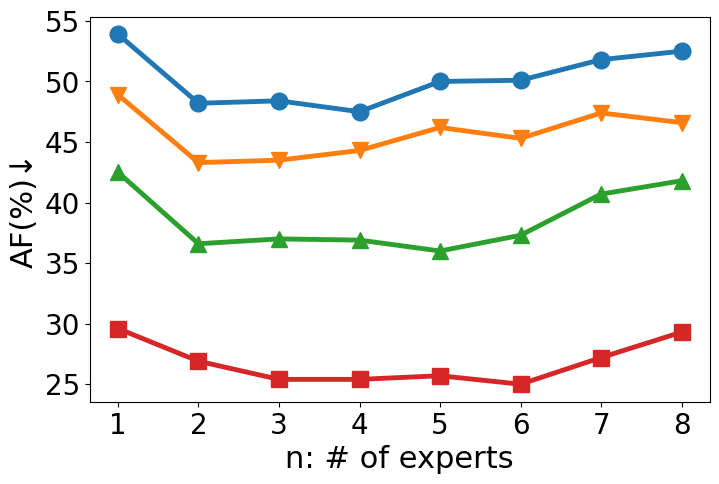

In [178]:
plot_curve(af_list, ylabel='AF(%)↓', with_legend=False)